**Importanto as Bibliotecas**

In [3]:
import pandas as pd
import os
from google.colab import files
import matplotlib.pyplot as plt

**Importandos os Arquivos**

In [4]:
uploaded = files.upload()

Saving Sales_April_2019.csv to Sales_April_2019.csv
Saving Sales_August_2019.csv to Sales_August_2019.csv
Saving Sales_December_2019.csv to Sales_December_2019.csv
Saving Sales_February_2019.csv to Sales_February_2019.csv
Saving Sales_January_2019.csv to Sales_January_2019.csv
Saving Sales_July_2019.csv to Sales_July_2019.csv
Saving Sales_June_2019.csv to Sales_June_2019.csv
Saving Sales_March_2019.csv to Sales_March_2019.csv
Saving Sales_May_2019.csv to Sales_May_2019.csv
Saving Sales_November_2019.csv to Sales_November_2019.csv
Saving Sales_October_2019.csv to Sales_October_2019.csv
Saving Sales_September_2019.csv to Sales_September_2019.csv


**Empilhando os Arquivos**

In [5]:
files = [file for file in uploaded]

all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [6]:
df = pd.read_csv("all_data.csv")

In [7]:
pd.read_csv("all_data.csv")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**Limpeza de dados**

Verificando a existência de NaN (Not a Number)

In [9]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


Removendo NaN

In [10]:
df.dropna(subset=["Order ID"], inplace=True)

Filtrando o cabeçalho dentro do Data Set


In [11]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_data = df[df['Order ID'] != 'Order ID']

Salvando o novo Data Set tratado

In [13]:
all_data.to_csv("all_data_trat.csv", index=False)

In [14]:
all_data = pd.read_csv("all_data_trat.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


**Enriquecer os dados com novas colunas**

In [15]:
all_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [16]:
all_data['Order ID'] = all_data['Order ID'].astype(str)

In [17]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [19]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
def get_city(address):
  return address.split(',')[1]
  
def get_state(address):
  return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


**Quais foram os melhores meses para vendas? Quanto foi arrecadado?**

In [21]:
results = all_data.groupby('Month').sum()
results.sort_values('Sales', ascending=False).round(2)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


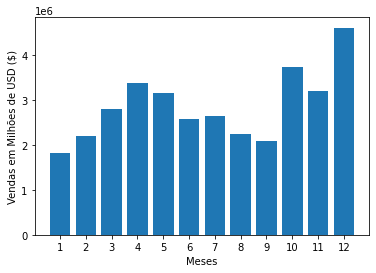

In [22]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Vendas em Milhões de USD ($)')
plt.xlabel('Meses')
plt.show()

**Quais cidades tiveram o maior valor em vendas?**

In [23]:
results = all_data.groupby('City').sum()
results.sort_values('Sales', ascending=False).round(2)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"San Francisco, CA",50239,8211461.74,315520,8262203.91
"Los Angeles, CA",33289,5421435.23,208325,5452570.80
"New York City, NY",27932,4635370.83,175741,4664317.43
"Boston, MA",22528,3637409.77,141112,3661642.01
"Atlanta, GA",16602,2779908.20,104794,2795498.58
"Dallas, TX",16730,2752627.82,104620,2767975.40
"Seattle, WA",16553,2733296.01,104941,2747755.48
"Portland, OR",11303,1860558.22,70621,1870732.34
"Austin, TX",11153,1809873.61,69829,1819581.75


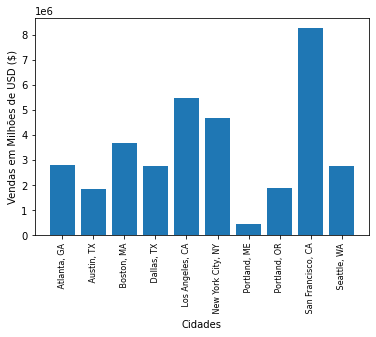

In [24]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Vendas em Milhões de USD ($)')
plt.xlabel('Cidades')
plt.show()

**Quando o cliente tem mais chance de comprar um produto? Qual o horário ideal para publicidade?** 

Convertendo a coluna Order Date para Date Time

In [25]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

Extraindo Data e Hora de Order Date

In [26]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


Contagem de compras por hora

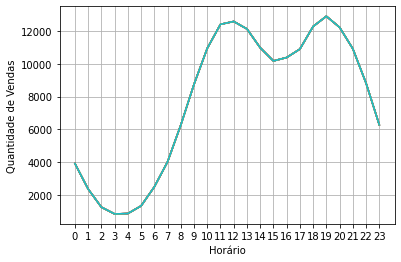

In [27]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Horário')
plt.grid()
plt.show()

**Quais produtos costumam ser vendidos juntos?**

In [28]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Qual produto é mais vendido? Por que ele é mais vendido?**

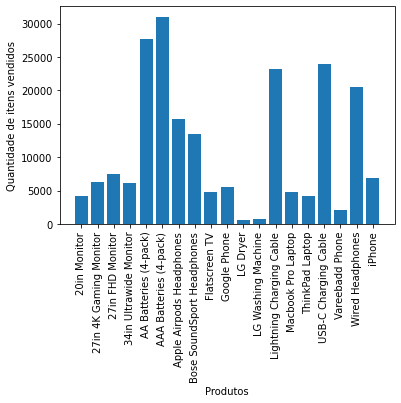

In [36]:
products = [product for product, df in all_data.groupby('Product')]

plt.bar(products, product_group.sum()['Quantity Ordered'])
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantidade de itens vendidos')
plt.xlabel('Produtos')
plt.show()

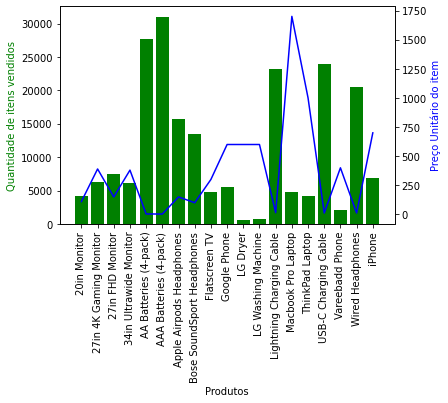

In [56]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_group.sum()['Quantity Ordered'], color='g')
ax2.plot(products, all_data.groupby('Product').mean()['Price Each'], 'b-')

ax1.set_xlabel('Produtos')
ax1.set_ylabel('Quantidade de itens vendidos', color='g')
ax2.set_ylabel('Preço Unitário do item', color='b')

ax1.set_xticklabels(products, rotation='vertical')

plt.show()
